   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


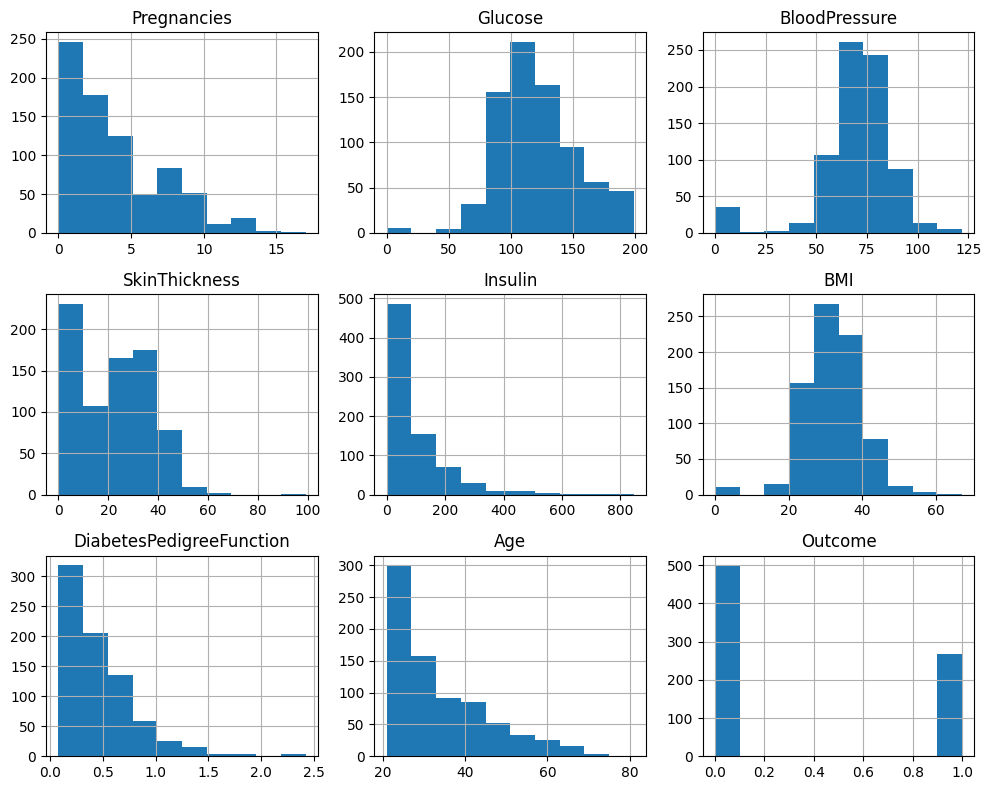

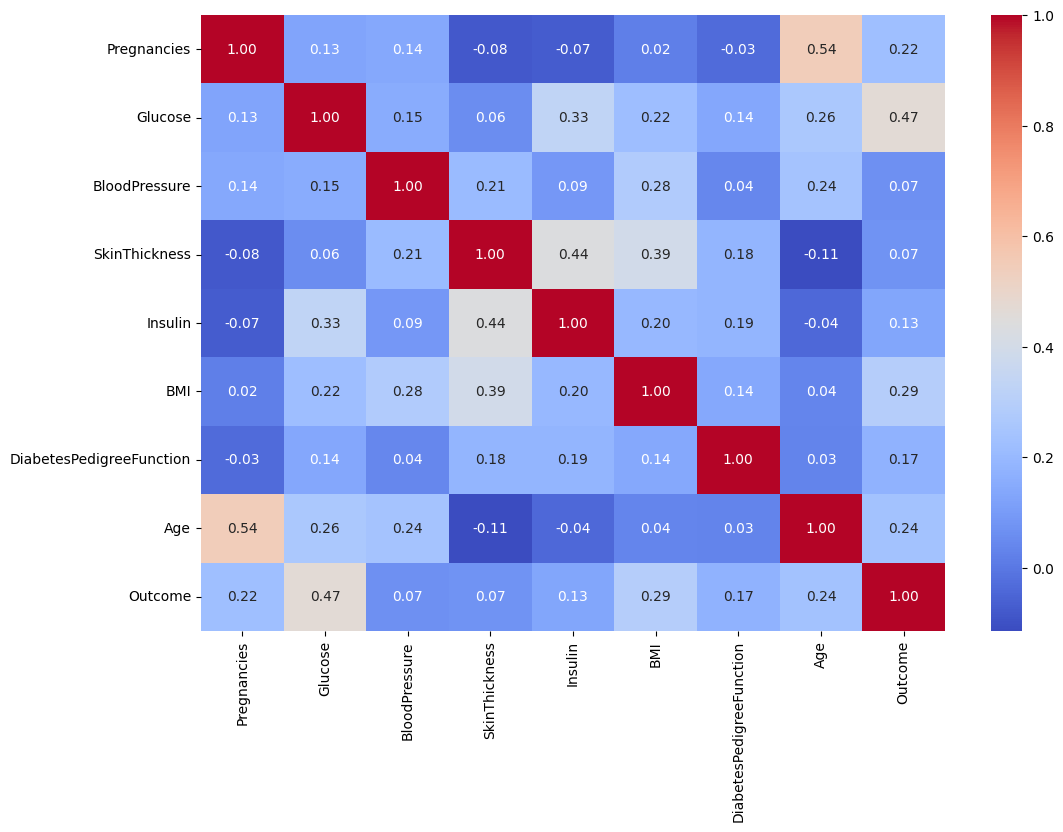

Accuracy of Decision Tree: 0.70
Accuracy of Decision Tree (max depth 5): 0.75
Accuracy of Logistic Regression: 0.74


<ipython-input-1-86600cdd3a71>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


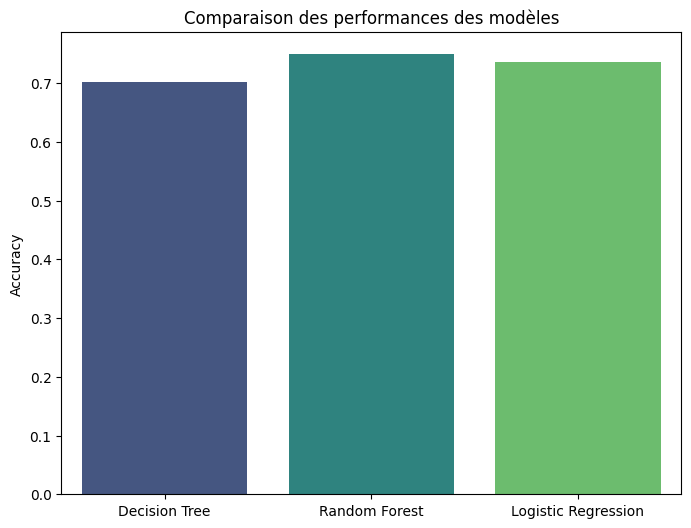

In [1]:
import pandas as pd

# Charger les données
df = pd.read_csv('diabetes.csv')

# Afficher les premières lignes
print(df.head())
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des histogrammes pour chaque variable
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Visualiser les corrélations entre les variables avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
#model1
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Séparer les variables indépendantes (X) et la variable cible (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle de l'arbre de décision
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

# Prédictions
y_pred1 = model1.predict(X_test)

# Évaluation
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy of Decision Tree: {accuracy1:.2f}")
#model2
# Modèle d'arbre de décision avec une profondeur maximale
model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(X_train, y_train)

# Prédictions
y_pred2 = model2.predict(X_test)

# Évaluation
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy of Decision Tree (max depth 5): {accuracy2:.2f}")
from sklearn.linear_model import LogisticRegression

# Modèle de régression logistique
model3 = LogisticRegression(random_state=42, max_iter=200)
model3.fit(X_train, y_train)

# Prédictions
y_pred3 = model3.predict(X_test)

# Évaluation
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy of Logistic Regression: {accuracy3:.2f}")
# Visualiser les performances
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy1, accuracy2, accuracy3]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparaison des performances des modèles')
plt.ylabel('Accuracy')
plt.show()


À la fin de cette analyse, nous pouvons observer les performances de chaque modèle. En général, les forêts aléatoires (Random Forest) ont tendance à mieux performer que les arbres de décision simples grâce à leur capacité à traiter la variance et les anomalies. La régression logistique est un bon modèle de base mais peut parfois ne pas capter des relations complexes dans les données.